In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\amort\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
client_stats = pd.read_csv('client_network_stats.csv')
server_stats = pd.read_csv('server_network_stats.csv')

# Preview the first few rows
print("Client Stats:")
print(client_stats.head())
print("\nServer Stats:")
print(server_stats.head())


FileNotFoundError: [Errno 2] No such file or directory: 'server_network_stats.csv'

In [39]:
print(client_stats.info())
print(server_stats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   operation         40 non-null     object 
 1   command           40 non-null     object 
 2   response_time_ms  40 non-null     float64
 3   filename          30 non-null     object 
 4   filesize_bytes    30 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   operation         40 non-null     object 
 1   command           10 non-null     object 
 2   response_time_ms  40 non-null     float64
 3   filename          30 non-null     object 
 4   filesize_bytes    30 non-null     float64
 5   rate_mb_s         30 non-null     float64
 6   time_s            30 non-null

In [40]:
print(client_stats.isnull().sum())
print(server_stats.isnull().sum())

operation            0
command              0
response_time_ms     0
filename            10
filesize_bytes      10
dtype: int64
operation            0
command             30
response_time_ms     0
filename            10
filesize_bytes      10
rate_mb_s           10
time_s              10
dtype: int64


In [41]:
print(client_stats.describe())
print(server_stats.describe())

       response_time_ms  filesize_bytes
count         40.000000    3.000000e+01
mean          47.816870    1.082480e+09
std           50.230494    8.808315e+08
min            0.094300    2.621440e+07
25%            1.013050    2.621440e+07
50%           33.011100    1.073742e+09
75%           81.602625    2.147484e+09
max          132.878900    2.147484e+09
       response_time_ms  filesize_bytes  rate_mb_s      time_s
count         40.000000    3.000000e+01  30.000000   30.000000
mean           4.837760    1.082480e+09  22.680201   45.661649
std            5.401691    8.808315e+08   1.485409   37.219266
min            0.159011    2.621440e+07  20.176009    1.022362
25%            0.647562    2.621440e+07  21.545669    1.169930
50%            1.084229    1.073742e+09  22.922515   45.490335
75%           10.702766    2.147484e+09  23.913480   84.973009
max           13.669234    2.147484e+09  24.675509  101.387869


In [42]:
# Convert response_time_ms to seconds and round to 3 decimal places
client_stats['response_time_s'] = (client_stats['response_time_ms'] / 1000).round(3)
server_stats['response_time_s'] = (server_stats['response_time_ms'] / 1000).round(3)

# Convert filesize_bytes to MB and round to 2 decimal places
client_stats['filesize_mb'] = (client_stats['filesize_bytes'] / (1024 * 1024)).round(2)
server_stats['filesize_mb'] = (server_stats['filesize_bytes'] / (1024 * 1024)).round(2)

# Drop the original response_time_ms and filesize_bytes columns
client_stats.drop(columns=['response_time_ms', 'filesize_bytes'], inplace=True)
server_stats.drop(columns=['response_time_ms', 'filesize_bytes'], inplace=True)

# Fill null or missing numerical values with 0
client_stats.fillna(0, inplace=True)
server_stats.fillna(0, inplace=True)

# Save the cleaned data back to CSV files
client_stats.to_csv('cleaned_client_network_stats.csv', index=False)
server_stats.to_csv('cleaned_server_network_stats.csv', index=False)

# Display the cleaned dataframes
print("Client Data:")
print(client_stats.head())

print("\nServer Data:")
print(server_stats.head())

Client Data:
  operation command filename  response_time_s  filesize_mb
0  response     DIR        0              0.0          0.0
1  response     DIR        0              0.0          0.0
2  response     DIR        0              0.0          0.0
3  response     DIR        0              0.0          0.0
4  response     DIR        0              0.0          0.0

Server Data:
  operation command   filename  rate_mb_s     time_s  response_time_s  \
0  response     DIR          0   0.000000   0.000000            0.000   
1    upload       0   test.txt  20.946264   1.193530            0.001   
2    upload       0  audio.wav  24.675509  41.498638            0.001   
3    upload       0  video.mp4  21.606003  94.788474            0.001   
4  download       0   test.txt  22.958215   1.088935            0.012   

   filesize_mb  
0          0.0  
1         25.0  
2       1024.0  
3       2048.0  
4         25.0  


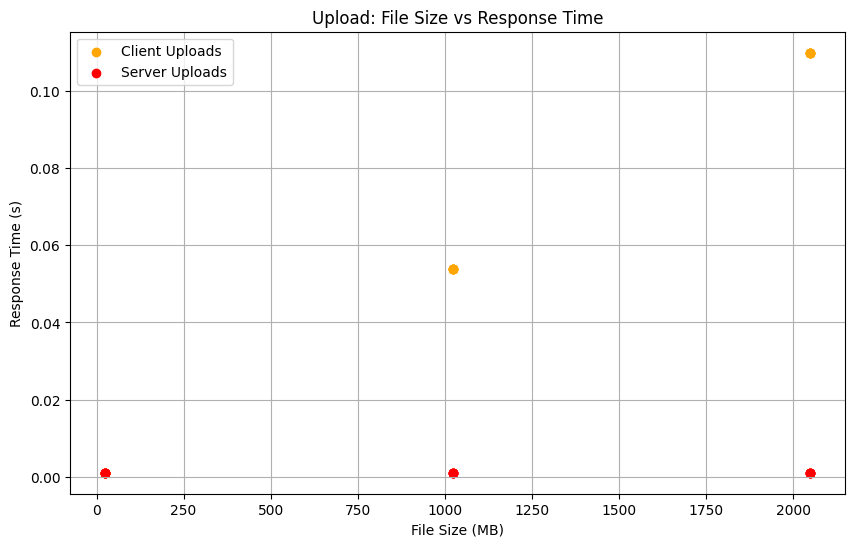

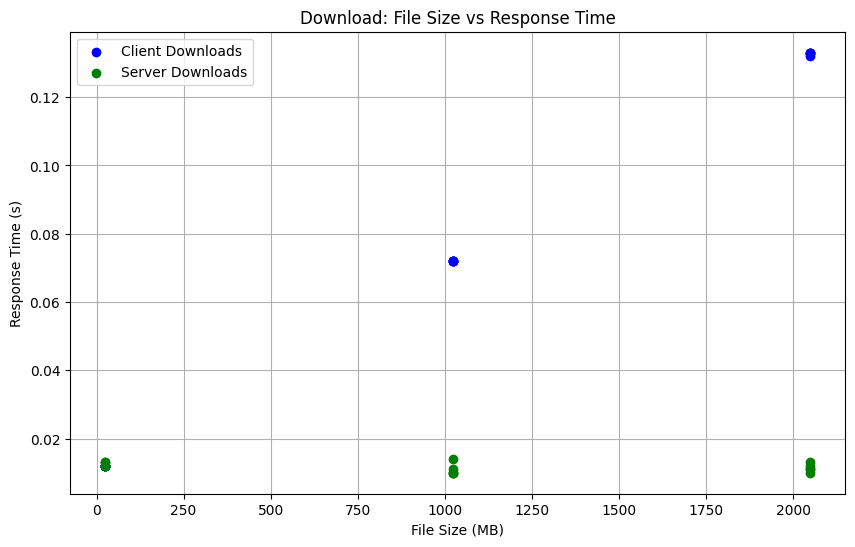

In [43]:
# Separate the data by command/operation
client_uploads = client_stats[client_stats['command'] == 'UPLOAD']
server_uploads = server_stats[server_stats['operation'] == 'upload']

client_downloads = client_stats[client_stats['command'] == 'DOWNLOAD']
server_downloads = server_stats[server_stats['operation'] == 'download']

client_dir = client_stats[client_stats['command'] == 'DIR']
server_dir = server_stats[server_stats['operation'] == 'DIR']

client_delete = client_stats[client_stats['command'] == 'DELETE']
server_delete = server_stats[server_stats['operation'] == 'DELETE']

client_logout = client_stats[client_stats['command'] == 'LOGOUT']
server_logout = server_stats[server_stats['operation'] == 'LOGOUT']

# Upload Analysis
plt.figure(figsize=(10, 6))
plt.scatter(client_uploads['filesize_mb'], client_uploads['response_time_s'], label='Client Uploads', color='orange')
plt.scatter(server_uploads['filesize_mb'], server_uploads['response_time_s'], label='Server Uploads', color='red')
plt.xlabel('File Size (MB)')
plt.ylabel('Response Time (s)')
plt.title('Upload: File Size vs Response Time')
plt.legend()
plt.grid()
plt.show()

# Download Analysis
plt.figure(figsize=(10, 6))
plt.scatter(client_downloads['filesize_mb'], client_downloads['response_time_s'], label='Client Downloads', color='blue')
plt.scatter(server_downloads['filesize_mb'], server_downloads['response_time_s'], label='Server Downloads', color='green')
plt.xlabel('File Size (MB)')
plt.ylabel('Response Time (s)')
plt.title('Download: File Size vs Response Time')
plt.legend()
plt.grid()
plt.show()


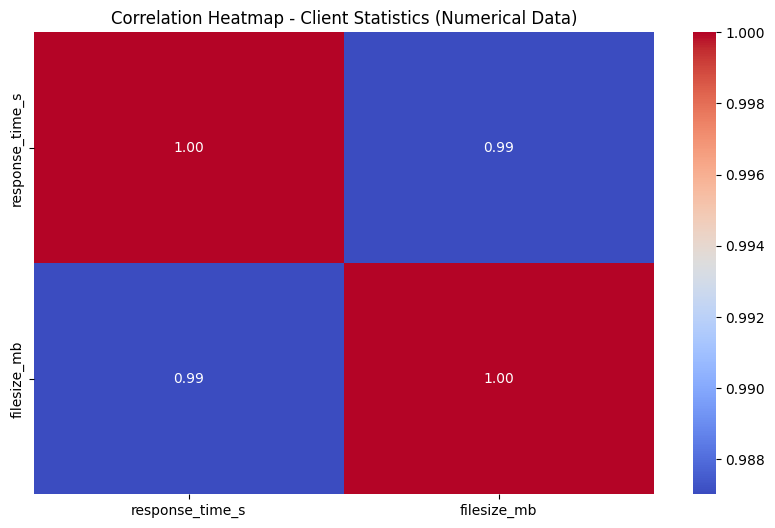

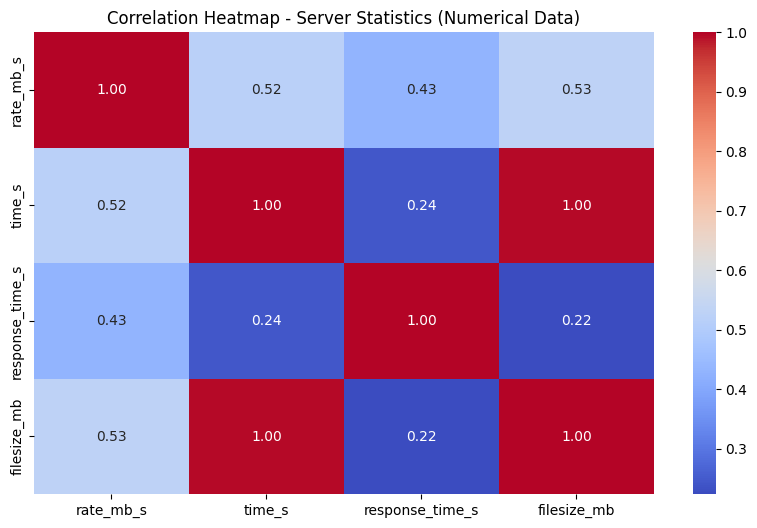

In [44]:
# Correlation heatmap for client_stats
plt.figure(figsize=(10, 6))
sns.heatmap(client_stats.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Client Statistics (Numerical Data)")
plt.show()

# Correlation heatmap for server_stats
plt.figure(figsize=(10, 6))
sns.heatmap(server_stats.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Server Statistics (Numerical Data)")
plt.show()